In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix
%cd /Users/dane/src/fitbit

df=pd.read_csv('fb1415_long.csv')
df1415 = df[(df.date>='2014-01-01') & (df.date<='2015-12-31')]
dfw=df1415.pivot(index='date', columns='variable', values='value').convert_objects(convert_numeric=True)
df1 = dfw[['biking_dane','steps_dane','steps_cindy', 'temp','humid','calories_dane', 'calories_cindy', 'weight_cindy','weight_dane']].convert_objects(convert_numeric=True)
dfw.columns

/Users/dane/src/fitbit


Index(['Travel', 'biking_dane', 'calories_cindy', 'calories_dane',
       'conditions', 'distance_cindy', 'distance_dane', 'humid', 'rain',
       'steps_cindy', 'steps_dane', 'temp', 'weight_cindy', 'weight_dane',
       'wind'],
      dtype='object', name='variable')

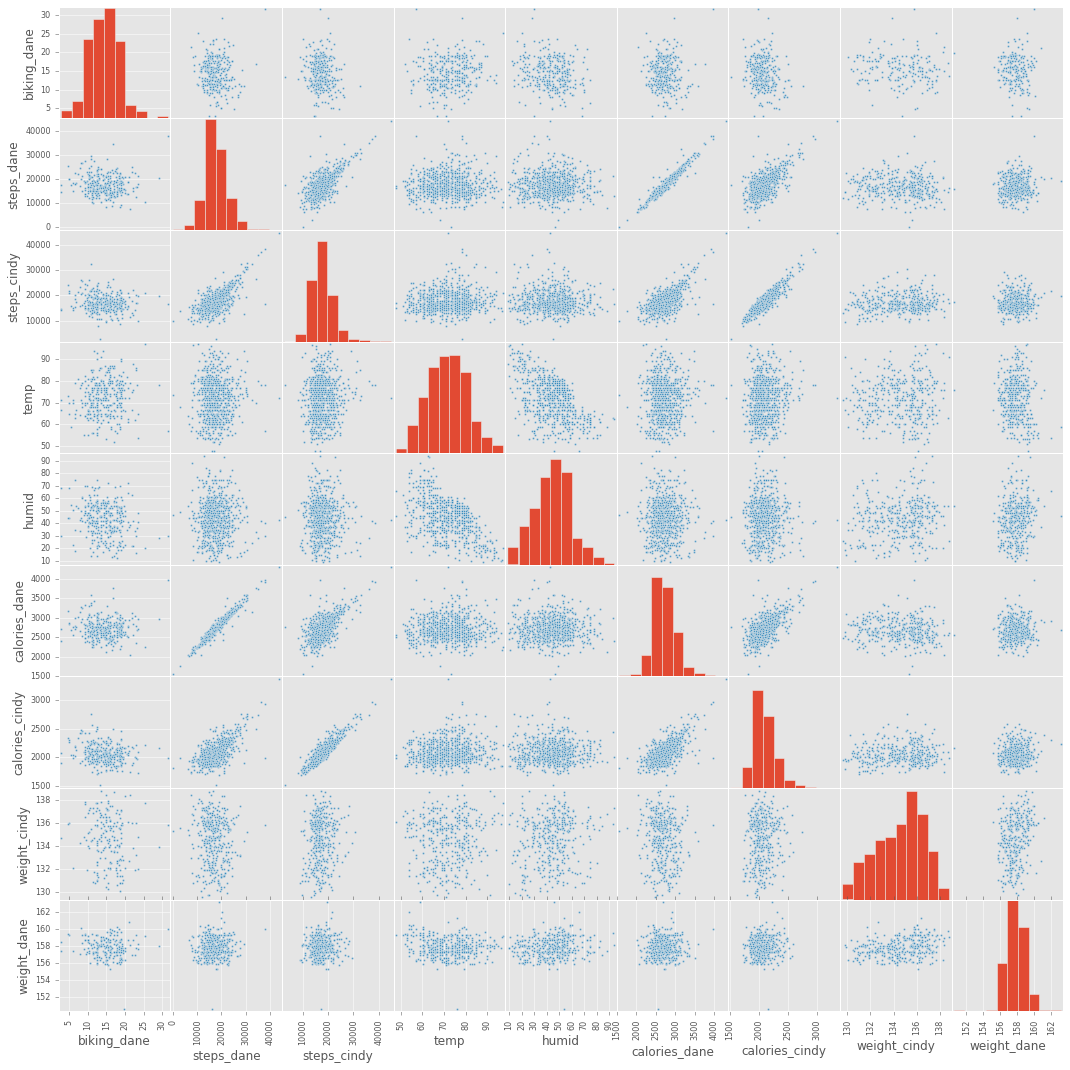

In [2]:
scatter_matrix(df1, alpha=0.8, figsize=(18, 18))
plt.show()

In [3]:
df45 = df[(df.date>='2014-01-01') & (df.date<='2015-12-31')]

In [4]:
df45w=df45.pivot(index='date', columns='variable', values='value').convert_objects(convert_numeric=True)
df45w.dtypes

variable
Travel             object
biking_dane       float64
calories_cindy      int64
calories_dane       int64
conditions         object
distance_cindy    float64
distance_dane     float64
humid             float64
rain              float64
steps_cindy         int64
steps_dane          int64
temp              float64
weight_cindy      float64
weight_dane       float64
wind              float64
dtype: object

In [5]:
df45w['dt'] = df45w.index
df45w.index=pd.to_datetime(df45w.dt,format='%Y-%m-%d')
df45w.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', 
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='dt', length=730, freq=None, tz=None)

In [6]:
dfm = pd.groupby(df45w,by=[df45w.index.year, df45w.index.month])

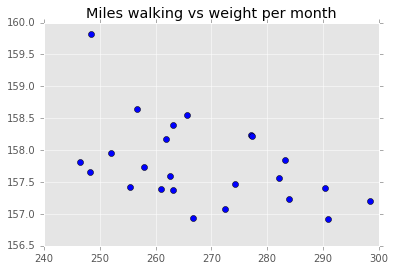

In [7]:
plt.plot(dfm.steps_dane.sum()/2000.,dfm.weight_dane.mean(),'bo')
plt.title('Miles walking vs weight per month')
plt.show()

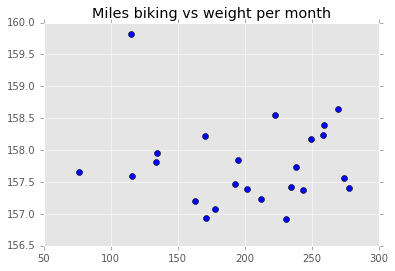

In [8]:
plt.plot(dfm.biking_dane.sum(),dfm.weight_dane.mean(),'bo')
plt.title('Miles biking vs weight per month')
plt.show()

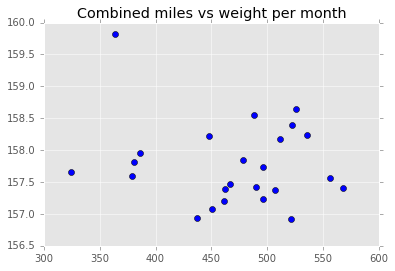

In [9]:
plt.plot(dfm.steps_dane.sum()/2000.+dfm.biking_dane.sum(),dfm.weight_dane.mean(),'bo')
plt.title('Combined miles vs weight per month')
plt.show()

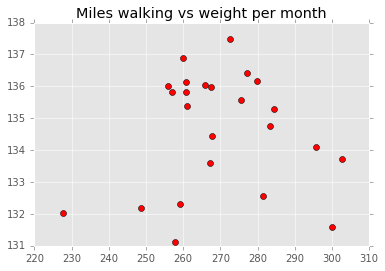

In [10]:
plt.plot(dfm.steps_cindy.sum()/2000.,dfm.weight_cindy.mean(),'ro')
plt.title('Miles walking vs weight per month')
plt.show()

In [11]:
df45w['goalmet_cindy'] = np.where(df45w['steps_cindy'] > 14000,1,-1)
df45w['goalmet_dane'] = np.where(df45w['steps_dane'] > 14000,1,-1)


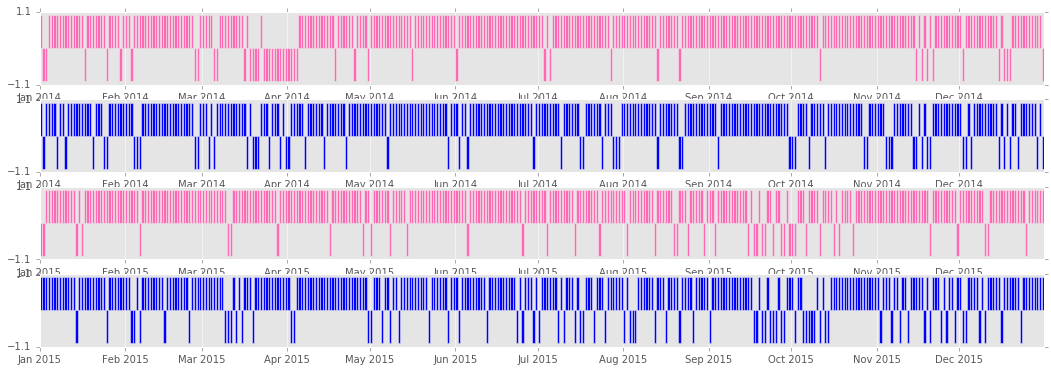

In [12]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(411)
dfp = df45w[df45w.index < '2015-01-01']
plt.bar(dfp.index, dfp.goalmet_cindy, color='hotpink')
plt.yticks([-1.1,1.1])
plt.subplot(412)
plt.bar(dfp.index, dfp.goalmet_dane, color='b')
plt.yticks([-1.1,1.1])
plt.subplot(413)
dfp = df45w[df45w.index >= '2015-01-01']
plt.bar(dfp.index, dfp.goalmet_cindy, color='hotpink')
plt.yticks([-1.1,1.1])
plt.subplot(414)
plt.bar(dfp.index, dfp.goalmet_dane, color='b')
plt.yticks([-1.1,1.1])
plt.show()

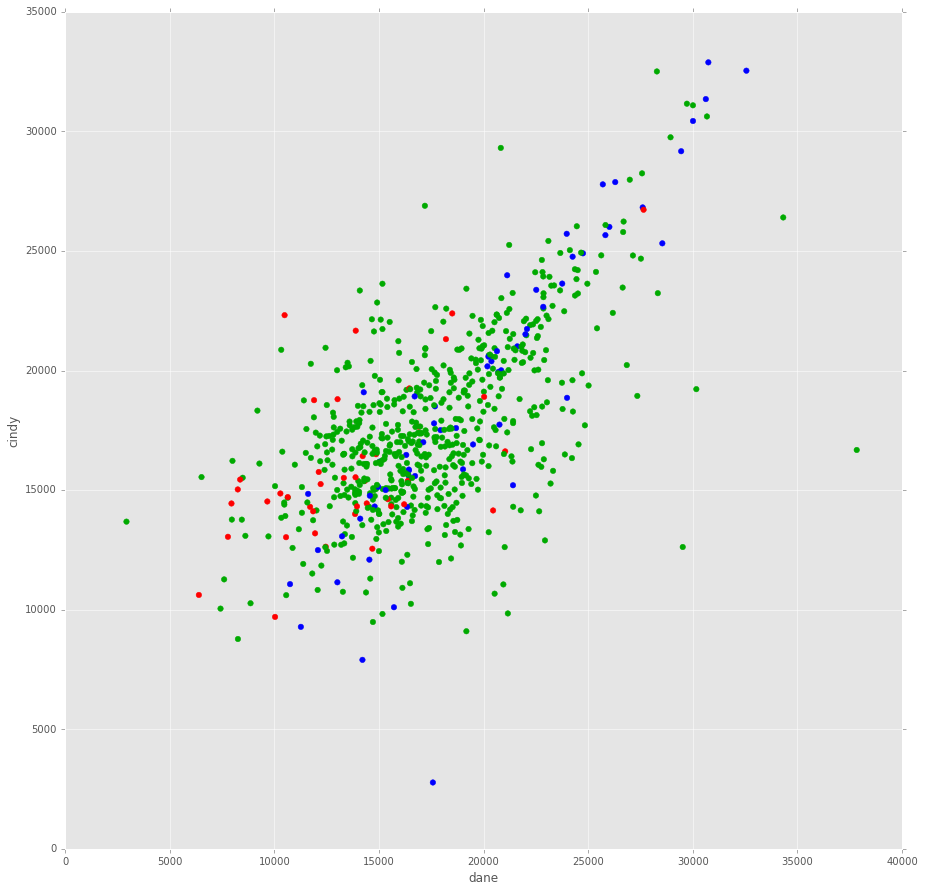

In [21]:
fig = plt.gcf()
fig.set_size_inches(15,15)
df45w.ix[df45w.Travel=='Work', 'color'] = '#FF0000'      # Work is red
df45w.ix[pd.isnull(df45w.Travel), 'color'] = '#00AA00'   # none is green
df45w.ix[df45w.Travel=='Vacation', 'color'] = '#0000FF'  # Vacation is blue
xx = df45w[(df45w.steps_dane>1000) & (df45w.steps_cindy>1000) & (df45w.steps_cindy<35000)]
#plt.scatter(df45w.steps_dane, df45w.steps_cindy, color=df45w.color, s=30)
plt.scatter(xx.steps_dane, xx.steps_cindy, color=xx.color, s=30)
plt.xlabel('dane')
plt.ylabel('cindy')


In [15]:
dfp.goalmet_cindy.value_counts()

 1    319
-1     46
dtype: int64

In [16]:
dfp.goalmet_dane.value_counts()

 1    288
-1     77
dtype: int64

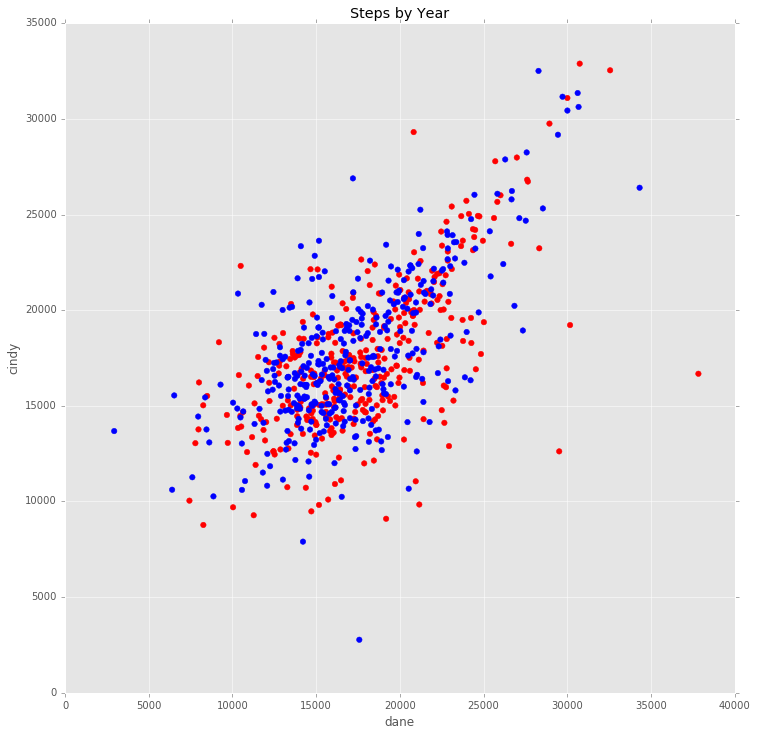

In [22]:
fig = plt.gcf()
fig.set_size_inches(12,12)
df45w.ix[df45w.index.year==2014, 'color'] = '#FF0000'  #  red
df45w.ix[df45w.index.year==2015, 'color'] = '#0000FF'  #  blue
xx = df45w[(df45w.steps_dane>1000) & (df45w.steps_cindy>1000) & (df45w.steps_cindy<35000)]
#plt.scatter(df45w.steps_dane, df45w.steps_cindy, color=df45w.color, s=30)
plt.scatter(xx.steps_dane, xx.steps_cindy, color=xx.color, s=30)
plt.title('Steps by Year')
plt.xlabel('dane')
plt.ylabel('cindy')